In [1]:

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [2]:
sc = SparkContext()

In [3]:
# Criando um contexto streaming com 10 segundos de intervalo a cada carga
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
#input text stream via tcp 
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [5]:
lines = socket_stream.window(20)

In [6]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [7]:

( lines.flatMap( lambda text: text.split( " " ) ) #divide as linhas em palavras
  .filter( lambda word: word.lower().startswith("#") ) # filtra por palavras começando com #
  .map( lambda word: ( word.lower(), 1 ) ) # letra minuscula
  .reduceByKey( lambda a, b: a + b ) # faz o count
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Armazena em um objeto Tweet
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )   # ordena pela contagem e manda para um DF
  .limit(10).registerTempTable("tweets") ) ) # Salva os Registros em uma tabela temporária

In [8]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
%matplotlib inline 

In [9]:
ssc.start()

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyspark\sql\dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


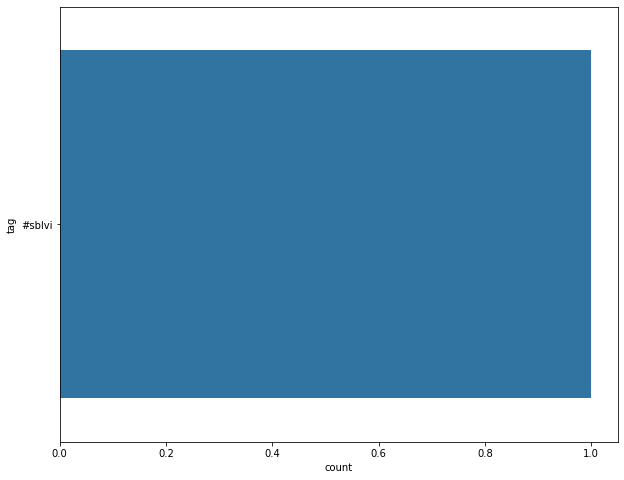

In [10]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [ ]:
ssc.stop()